In [11]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor


In [15]:
# Load the dataset
data_path = "C:/Users/thisi/OneDrive/共有ファイル/卒研Bデータ/卒研後の遊び場/IsolationForest外れ値除去後.csv"
df = pd.read_csv(data_path)
df['SD_dis'] = df['SD_con'].apply(lambda x: 1 if x > 50 else 0)

# Print basic info for inspection
print("Dataset preview:")
print(df.head())
print("/nColumns in the dataset:")
print(df.columns.tolist())

# Specify the treatment and outcome column names (adjust as needed)
treatment_col = 'Cossim_model6'  # Binary indicator for treatment assignment
outcome_col = 'SD_dis'      # Outcome variable

# Use all other columns as covariates/features for the model
feature_cols = [col for col in df.columns if col not in [treatment_col, outcome_col]]
print("\nFeature columns used for causal inference:")
print(feature_cols)

# Prepare the data
X = df[feature_cols].values   # Covariates/features
T = df[treatment_col].values    # Treatment (assumed binary)
y = df[outcome_col].values      # Outcome

# Initialize the CausalForestDML estimator.
# We specify RandomForestRegressor for both the outcome and treatment models.
# If your treatment is binary, set discrete_treatment=True.
est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    n_estimators=1000,
    discrete_treatment=True,
    random_state=42
)

# Fit the causal forest model
est.fit(y, T, X=X)

# Estimate the individual treatment effects (CATEs) for each observation
te = est.effect(X)
te_lb, te_ub = est.effect_interval(X)  # Lower and upper bounds for the confidence intervals

print("\nEstimated Individual Treatment Effects (first 10):")
print(te[:10])
print("\nConfidence Interval Lower Bounds (first 10):")
print(te_lb[:10])
print("\nConfidence Interval Upper Bounds (first 10):")
print(te_ub[:10])

# Optionally, compute and print the Average Treatment Effect (ATE)
ate = np.mean(te)
print("\nEstimated Average Treatment Effect (ATE):", ate)

Dataset preview:
   SD_con  Interest  readers'_vocabulary  Total_duration_of_fixations  \
0   8.782    60.321                67528                         3550   
1  56.090    60.321                67528                         9582   
2   9.808    60.321                67528                         6521   
3   9.679    60.321                67528                        10038   
4   7.756    60.321                67528                         9492   

   Average_duration_of_fixations  Minimum_duration_of_fixations  \
0                            237                             98   
1                            252                            118   
2                            284                             69   
3                            257                             72   
4                            226                             91   

   Maximum_duration_of_fixations  Number_of_fixations  Time_to_first_fixation  \
0                            752                   15       

ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [16]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Load the dataset
data_path = "C:/Users/thisi/OneDrive/共有ファイル/卒研Bデータ/卒研後の遊び場/IsolationForest外れ値除去後.csv"
df = pd.read_csv(data_path)
df['SD_dis'] = df['SD_con'].apply(lambda x: 1 if x > 50 else 0)

# Inspect the data
print("Dataset preview:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Specify the treatment and outcome column names (adjust as needed)
treatment_col = 'Cossim_model6'  # Binary indicator for treatment assignment
outcome_col = 'SD_dis'      # Outcome variable

# Use all other columns as covariates/features for the model
feature_cols = [col for col in df.columns if col not in [treatment_col, outcome_col]]
print("\nFeature columns used for causal inference:")
print(feature_cols)

# Prepare the data
X = df[feature_cols].values   # Covariates/features
T = df[treatment_col].values    # Treatment (assumed binary)
y = df[outcome_col].values      # Outcome

# Check treatment distribution
print("\nTreatment distribution:")
print(pd.Series(T).value_counts())

# Define a custom cross-validation splitter to avoid stratification issues
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Initialize the CausalForestDML estimator with the custom cv
est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    n_estimators=1000,
    discrete_treatment=True,
    random_state=42,
    cv=cv
)

# Fit the causal forest model
est.fit(y, T, X=X)

# Estimate the individual treatment effects (CATEs) for each observation
te = est.effect(X)
te_lb, te_ub = est.effect_interval(X)  # Lower and upper bounds for the confidence intervals

print("\nEstimated Individual Treatment Effects (first 10):")
print(te[:10])
print("\nConfidence Interval Lower Bounds (first 10):")
print(te_lb[:10])
print("\nConfidence Interval Upper Bounds (first 10):")
print(te_ub[:10])

# Optionally, compute and print the Average Treatment Effect (ATE)
ate = np.mean(te)
print("\nEstimated Average Treatment Effect (ATE):", ate)


Dataset preview:
   SD_con  Interest  readers'_vocabulary  Total_duration_of_fixations  \
0   8.782    60.321                67528                         3550   
1  56.090    60.321                67528                         9582   
2   9.808    60.321                67528                         6521   
3   9.679    60.321                67528                        10038   
4   7.756    60.321                67528                         9492   

   Average_duration_of_fixations  Minimum_duration_of_fixations  \
0                            237                             98   
1                            252                            118   
2                            284                             69   
3                            257                             72   
4                            226                             91   

   Maximum_duration_of_fixations  Number_of_fixations  Time_to_first_fixation  \
0                            752                   15       

AttributeError: Provided crossfit folds contain training splits that don't contain all treatments

In [17]:
print("Treatment distribution:")
print(pd.Series(T).value_counts())

Treatment distribution:
0.920243    1
0.925730    1
0.856734    1
0.918042    1
0.933559    1
           ..
0.915036    1
0.883699    1
0.827327    1
0.859052    1
0.849844    1
Name: count, Length: 511, dtype: int64


In [6]:
import pandas as pd
import numpy as np
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Load the dataset
data_path = "C:/Users/thisi/OneDrive/共有ファイル/卒研Bデータ/卒研後の遊び場/IsolationForest外れ値除去後.csv"
df = pd.read_csv(data_path)
df['SD_dis'] = df['SD_con'].apply(lambda x: 1 if x > 50 else 0)

# Inspect the data
print("Dataset preview:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Specify the treatment and outcome column names (adjust as needed)
treatment_col = 'Cossim_model6'  # Continuous treatment variable
outcome_col = 'SD_dis'      # Outcome variable

# Use all other columns as covariates/features for the model
feature_cols = [col for col in df.columns if col not in [treatment_col, outcome_col]]
print("\nFeature columns used for causal inference:")
print(feature_cols)

# Prepare the data
X = df[feature_cols].values   # Covariates/features
T = df[treatment_col].values    # Treatment (continuous)
y = df[outcome_col].values      # Outcome

# Check treatment distribution
print("\nTreatment distribution:")
print(pd.Series(T).value_counts())

# Define a custom cross-validation splitter
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Initialize the CausalForestDML estimator for continuous treatment
est = CausalForestDML(
    model_y=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    model_t=RandomForestRegressor(n_estimators=100, min_samples_leaf=10),
    n_estimators=1000,
    discrete_treatment=False,  # Set to False because treatment is continuous
    random_state=42,
    cv=cv
)

# Fit the causal forest model
est.fit(y, T, X=X, cache_values=True)

# Estimate the individual treatment effects (CATEs) for each observation
te = est.effect(X)
te_lb, te_ub = est.effect_interval(X)  # Confidence interval bounds

print("\nEstimated Individual Treatment Effects (first 10):")
print(te[:10])
print("\nConfidence Interval Lower Bounds (first 10):")
print(te_lb[:10])
print("\nConfidence Interval Upper Bounds (first 10):")
print(te_ub[:10])

# Optionally, compute and print the Average Treatment Effect (ATE)
ate = np.mean(te)
print("\nEstimated Average Treatment Effect (ATE):", ate)


Dataset preview:
   SD_con  Interest  readers'_vocabulary  Total_duration_of_fixations  \
0   8.782    60.321                67528                         3550   
1  56.090    60.321                67528                         9582   
2   9.808    60.321                67528                         6521   
3   9.679    60.321                67528                        10038   
4   7.756    60.321                67528                         9492   

   Average_duration_of_fixations  Minimum_duration_of_fixations  \
0                            237                             98   
1                            252                            118   
2                            284                             69   
3                            257                             72   
4                            226                             91   

   Maximum_duration_of_fixations  Number_of_fixations  Time_to_first_fixation  \
0                            752                   15       

In [7]:
est.summary(alpha=0.05)

Population summary of CATE predictions on Training Data
Doubly Robust ATE on Training Data Results:  Doubly Robust ATE calculation on training data is available only on discrete treatments!
Doubly Robust ATT on Training Data Results:  Doubly Robust ATT calculation on training data is available only on discrete treatments!


<class 'econml.utilities.Summary'>
"""
               Uncertainty of Mean Point Estimate               
================================================================
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.036       0.124 -0.286  0.775        -0.279         0.208
      Distribution of Point Estimate     
=========================================
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.069           -0.18           0.073
     Total Variance of Point Estimate     
==========================================
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.142         -0.335          0.222
------------------------------------------

Note: The stderr_mean is a conservative upper bound.
"""

In [4]:
import shap

 99%|===================| 505/511 [00:15<00:00]        

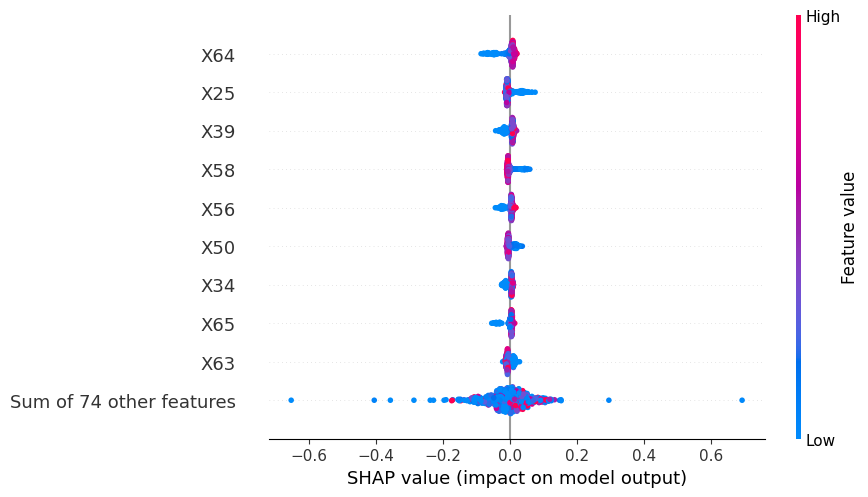

In [8]:
shap_values = est.shap_values(X)
shap.plots.beeswarm(shap_values['Y0']['T0'])